# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/1_gluoncv_finetune/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Parent_Directory (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# About the Network

1. Blog 1 on MobileNet - https://towardsdatascience.com/review-mobilenetv1-depthwise-separable-convolution-light-weight-model-a382df364b69

2. Blog 2 on MobileNet - https://machinethink.net/blog/mobilenet-v2/

3. Blog 3 on MobileNet - https://medium.com/@yu4u/why-mobilenet-and-its-variants-e-g-shufflenet-are-fast-1c7048b9618d

4. Blog 1 on SSD - https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11

5. Blog 2 on SSD-512 - https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06

6. Blog 3 on SSD - https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab

7. Reference Tutorial - https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html

In [1]:
import os
import sys
sys.path.append("../../1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

# Download Dataset

- credits: https://sci2s.ugr.es/weapons-detection

- Install kaggle client using: https://github.com/Kaggle/kaggle-api
    - CMD: `pip install -U kaggle`
    

In [4]:
! kaggle datasets download -d abhishek4273/gun-detection-dataset -q

In [5]:
! unzip -qq gun-detection-dataset.zip

In [4]:
root = "weapons/";                         
img_dir = "Images/";                                                     
anno_file = "train_labels.csv";
batch_size=8;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

In [6]:
gtf.system_dict["classes"]

['pistol']

In [7]:
pretrained = True;         
gpu=True;
model_name = "ssd_512_mobilenet1.0_coco";  

In [8]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

/home/abhi/.virtualenvs/monk_obj_1_gluoncv_finetune/lib/python3.6/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [9]:
gtf.Set_Learning_Rate(0.001);

In [10]:
epochs=3;
params_file = "saved_model.params";

In [11]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.791 samples/sec, CrossEntropy=8.175, SmoothL1=1.300
[Epoch 0][Batch 20], Speed: 22.063 samples/sec, CrossEntropy=5.488, SmoothL1=1.311
[Epoch 0][Batch 40], Speed: 17.245 samples/sec, CrossEntropy=4.474, SmoothL1=1.388
[Epoch 0][Batch 60], Speed: 14.803 samples/sec, CrossEntropy=3.910, SmoothL1=1.402
[Epoch 0][Batch 80], Speed: 16.718 samples/sec, CrossEntropy=3.589, SmoothL1=1.372
[Epoch 0][Batch 100], Speed: 14.478 samples/sec, CrossEntropy=3.350, SmoothL1=1.326
[Epoch 0][Batch 120], Speed: 5.079 samples/sec, CrossEntropy=3.190, SmoothL1=1.294
[Epoch 0][Batch 140], Speed: 9.124 samples/sec, CrossEntropy=3.054, SmoothL1=1.263
[Epoch 0][Batch 160], Speed: 7.443 samples/sec, CrossEntropy=2.945, SmoothL1=1.229
[Epoch 0][Batch 180], Speed: 18.306 samples/sec, CrossEntropy=2.868, SmoothL1=1.193
[Epoch 0][Batch 200], Speed: 8.012 samples/sec, CrossEntropy=2.799, SmoothL1=1.166
[Epoch 0][Batch 220], Speed: 8.642 samples/sec, CrossEntropy=2.741, SmoothL1=1.175
[Epo

# Running Inference

In [12]:
import os
import sys
sys.path.append("../../1_gluoncv_finetune/lib/");

In [13]:
from inference_prototype import Infer

In [14]:
model_name = "ssd_512_mobilenet1.0_coco";
params_file = "saved_model.params";
class_list = ["weapon"];

In [15]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

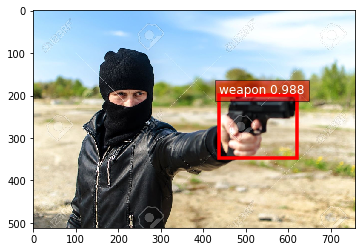

In [16]:
img_name = "../sample_dataset/weapons_test/img1.jpg"; 
visualize = True;
thresh = 0.9;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

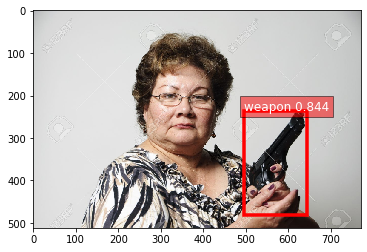

In [19]:
img_name = "../sample_dataset/weapons_test/img2.jpg"; 
visualize = True;
thresh = 0.5;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

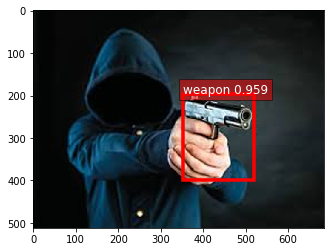

In [50]:
img_name = "../sample_dataset/weapons_test/img3.jpg"; 
visualize = True;
thresh = 0.9;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

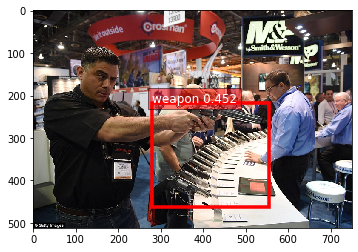

In [28]:
img_name = "../sample_dataset/weapons_test/img4.jpg"; 
visualize = True;
thresh = 0.45;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

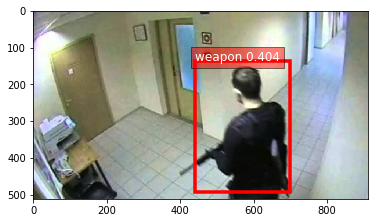

In [32]:
img_name = "../sample_dataset/weapons_test/img5.jpeg"; 
visualize = True;
thresh = 0.4;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

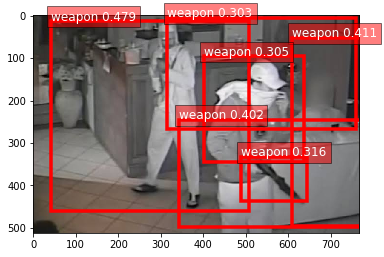

In [35]:
img_name = "../sample_dataset/weapons_test/img7.jpeg"; 
visualize = True;
thresh = 0.3;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

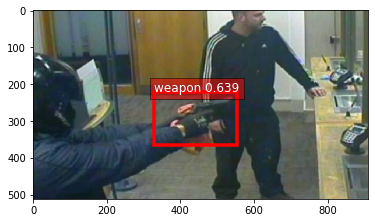

In [37]:
img_name = "../sample_dataset/weapons_test/img8.jpeg";
visualize = True;
thresh = 0.6;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

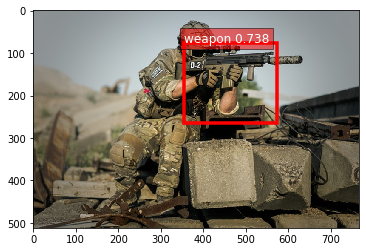

In [39]:
img_name = "../sample_dataset/weapons_test/img9.jpg";
visualize = True;
thresh = 0.6;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

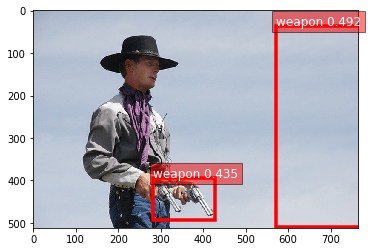

In [46]:
img_name = "../sample_dataset/weapons_test/img13.jpg";
visualize = True;
thresh = 0.4;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

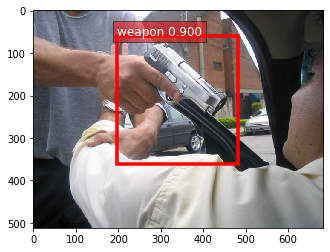

In [48]:
img_name = "../sample_dataset/weapons_test/img14.jpg";
visualize = True;
thresh = 0.6;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

# Author - Tessellate Imaging - https://www.tessellateimaging.com/

# Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning


## Monk features
   - low-code
   - unified wrapper over major deep learning framework - keras, pytorch, gluoncv
   - syntax invariant wrapper

## Enables

    - to create, manage and version control deep learning experiments
    - to compare experiments across training metrics
    - to quickly find best hyper-parameters

## At present it only supports transfer learning, but we are working each day to incorporate

    - GUI based custom model creation
    - various object detection and segmentation algorithms
    - deployment pipelines to cloud and local platforms
    - acceleration libraries such as TensorRT
    - preprocessing and post processing libraries


## To contribute to Monk AI or Monk Object Detection repository raise an issue in the git-repo or dm us on linkedin

    - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    - Akash - https://www.linkedin.com/in/akashdeepsingh01/

